<a href="https://colab.research.google.com/github/Angelpperez/Estudio_bib_Tesis/blob/main/SyntheticVesselDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

def get_images(hdf5_path, patient_id, slice_id):
    with h5py.File(hdf5_path, 'r') as h5f:
        idm = f'{patient_id}'
        img = h5f[f'{idm}/image/{slice_id}'][()]
        mask = h5f[f'{idm}/mask/{slice_id}'][()]
        img_fake = h5f[f'{idm}/image_fake/{slice_id}'][()]
        img_inpaint = h5f[f'{idm}/image_inpaint/{slice_id}'][()]

    return img, mask, img_fake, img_inpaint

def dataframe_from_hdf5(hdf5_path):
    df = {'patient_id': [], 'dataset': [], 'slices': []}
    with h5py.File(hdf5_path, 'r') as h5f:
        patients = list(h5f.keys())
        for idm in patients:
            num_slices = max([int(k) for k in h5f[f'{idm}/image'].keys()])
            dataset = 'colorectal' if 'CRLM-' in idm else '3Dircadb'
            df['patient_id'].append(idm)
            df['dataset'].append(dataset)
            df['slices'].append(num_slices)
    df = pd.DataFrame(df)
    return df

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1erq2DUnqtLXhI4vHB0oqb25rdzUjg86j/view?usp=sharing -O 'gan_dataset.hdf5'

Downloading...
From (original): https://drive.google.com/uc?id=1erq2DUnqtLXhI4vHB0oqb25rdzUjg86j
From (redirected): https://drive.google.com/uc?id=1erq2DUnqtLXhI4vHB0oqb25rdzUjg86j&confirm=t&uuid=19278545-28ed-47de-b72f-fd689a90e66a
To: /content/gan_dataset.hdf5
100% 4.52G/4.52G [01:32<00:00, 49.0MB/s]


In [ ]:
dataset_dir = r'.'
hdf5_path = os.path.join(dataset_dir, 'gan_dataset.hdf5')
df = dataframe_from_hdf5(hdf5_path)
df

,patient_id,dataset,slices
0,3Dircadb1-1,3Dircadb,84
1,3Dircadb1-10,3Dircadb,75
2,3Dircadb1-11,3Dircadb,75
3,3Dircadb1-12,3Dircadb,231
4,3Dircadb1-13,3Dircadb,61
...,...,...,...
212,CRLM-CT-1194,colorectal,13
213,CRLM-CT-1195,colorectal,23
214,CRLM-CT-1196,colorectal,96
215,CRLM-CT-1197,colorectal,72


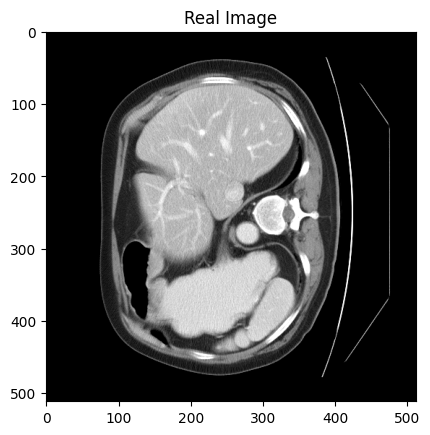

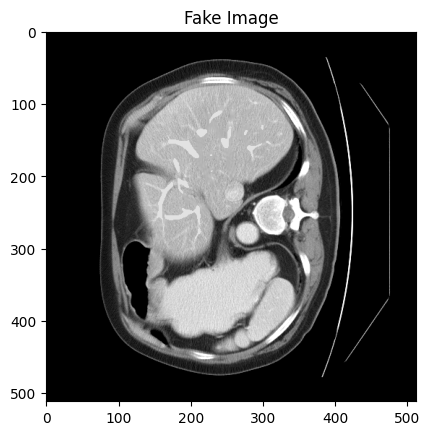

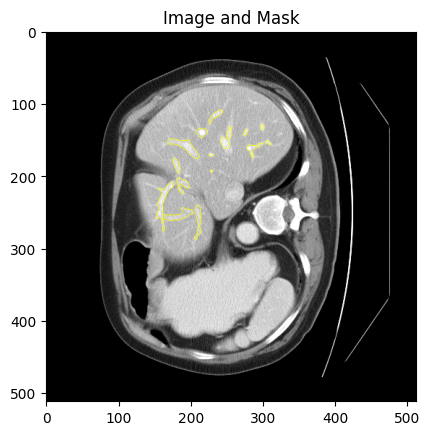

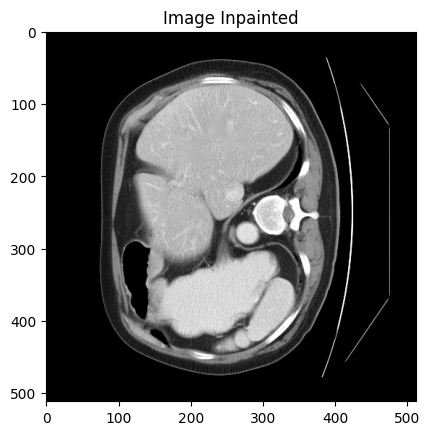

In [ ]:
sample = df.sample(n=1).iloc[0]
patient_id = sample['patient_id']
dataset = sample['dataset']
slice_id = np.random.randint(0, sample['slices'])

img, mask, img_fake, img_inpaint = get_images(hdf5_path, patient_id, slice_id)

img_mask = mark_boundaries(img, mask)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Real Image')
plt.show()

plt.imshow(img_fake, cmap='gray', vmin=0, vmax=255)
plt.title(f'Fake Image')
plt.show()

plt.imshow(img_mask)
plt.title(f'Image and Mask')
plt.show()

plt.imshow(img_inpaint, cmap='gray', vmin=0, vmax=255)
plt.title(f'Image Inpainted')
plt.show()
